## Final Project
## Group member: Jingmin Chen, Yusen Wu, Jiaqi Min


## Introduction
* We all know that 'Money can't buy you happiness' but we also believe happiness score changes when economy changing, which could reflect on alcohol consumption.
* In our research, we are going to dive into alcohol consumption and economy in different area. The datasets we found contain attributes like GDP per capita & HDI (Human Development Index), which indicate difference economic level and living expenses, the higher GDP per capita and HDI are, the better economy is. We are going to focus on the change in between economy, alcohol consumption and happiness score in different region. Beyond that, this research covers the price point and quality of wine as well； certain features of higher rated wine at different price point, so our targeted audience can get more information of alcohol business.


## Research Questions
* What is the correlation between alcohol consumption and economy of different regions.This research question intent to uncover, the correlation between alcohol consumption and economy, specificaly we believe wine consumption may reflect economy more than other type of alcohol, we will also explain what make the wine consumption different, what are features of higher-rated wine and also price difference.
* Results of our research questions might be used for an alcohol company or individual liquor store, providing them a better view of the liquor business, including price aspect and category aspect. Our research can provide them more information about how to position their product,individual store or liquor company depending on the local economics.

In [4]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Use pd.read_csv load csv file from github
First dataset we used here contains a lots of information and we focus on 3 of them. Happiness score indicats how happy the citizens feel. HDI is Human Develpment Index, tell us the economy status. Itvis a way to measure well being within a country. This is mainly a social measurement because it takes into consideration education, health care and finally the economic factor of GDP. And alcohol comsumption(beer, spirit and wine). 


In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/TTZUO/DAV-5400/master/HappinessAlcoholConsumption.csv")
data.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


Check the detail of "data", there is no null value in this dataframe

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
Country             122 non-null object
Region              122 non-null object
Hemisphere          122 non-null object
HappinessScore      122 non-null float64
HDI                 122 non-null int64
GDP_PerCapita       122 non-null float64
Beer_PerCapita      122 non-null int64
Spirit_PerCapita    122 non-null int64
Wine_PerCapita      122 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


The maximum happinessScore is 7.526, the minimum happinessScore is 3.069, the mean HDI is 740,88, the mean Wine consumption is 66.59. etc

In [7]:
data.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,91.482836,137.565574,96.598361,66.598361
std,1.148736,149.846124,209.577313,104.817353,81.435028,88.121503
min,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000
25%,4.528250,663.750000,4.134250,38.250000,25.500000,5.000000
50%,5.542000,757.500000,12.016000,125.500000,82.500000,16.000000
75%,6.477000,861.500000,41.990000,224.750000,142.500000,112.750000
max,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000


Create a new column call "total_PerCapita" to store the total consumption of beer, spirit and wine, and we found the higher HDI, the higher total consumption

In [17]:
data["total_PerCapita"] = data["Beer_PerCapita"] + data["Spirit_PerCapita"] + data["Wine_PerCapita"]
data.head(1)

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,total_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,583


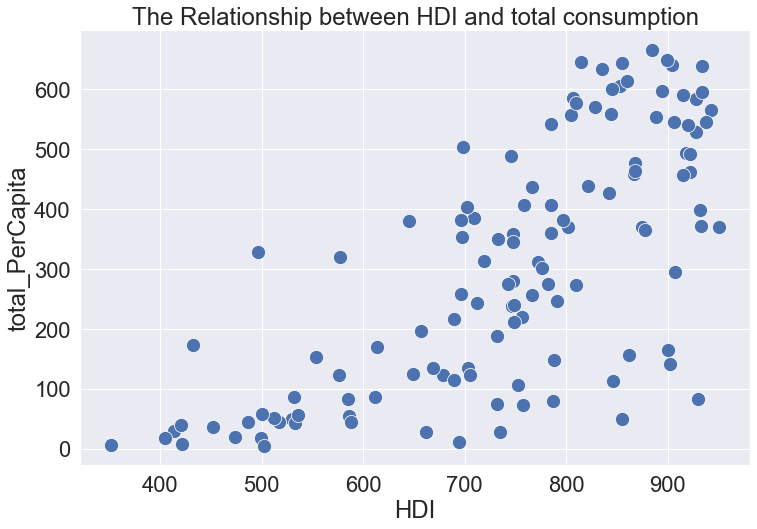

In [18]:
# use sns.countplot() funtion to create a plot 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="HDI", y="total_PerCapita", data=data, s = 200)
plt.title('The Relationship between HDI and total consumption');

As we can see from the scatter, people living in countries with better economy(higher HDI) feel happier

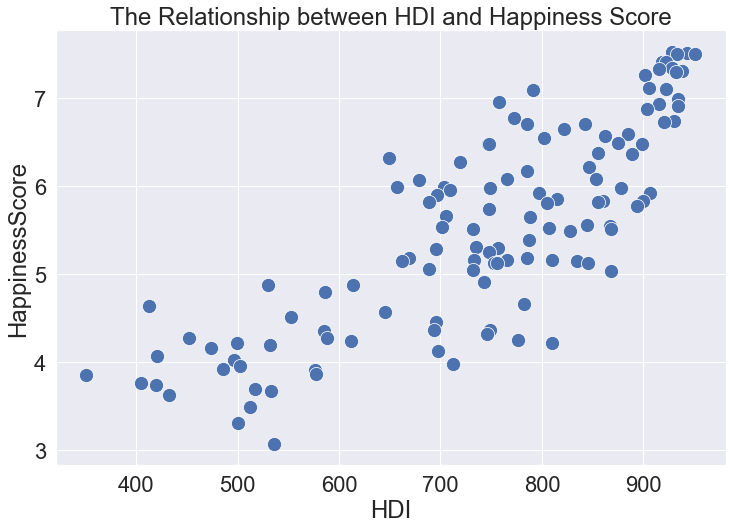

In [9]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="HDI", y="HappinessScore", data=data, s = 200)
plt.title('The Relationship between HDI and Happiness Score');
sns.set(font_scale = 2)

For The relationship between beer, spirit, wine and HID, we think this tableau chart shows the relationship between HDI and alcohol more intuitively, so we insert it from tableau, it is really interesting that beer and spirit show no trend but wine consumption are generally higher if a country has higher HDI. In other words, a high wine consumption indicates a better economy. 

<img src="picture1.png" width="250">

conclusion: From our first dataset we can say that a better economy brings a higher alcohol consumption, especially wine consumption. So a liquor store can change their wine inventory according to their location and target customers. 

From here we decide to dive deep into wine research, to find out what makde wine have better review and some other features.So we have our second dataset, wine price and review. 
Use pd.ead_json read json file from github

In [20]:
data1 = pd.read_json("https://raw.githubusercontent.com/TTZUO/DAV-5400/master/winemag-data-130k-v2.json")
data1.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


The mean points is 88.45 and the mean price is 35.4

In [21]:
data1.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


This dataset has total 129971 rows and most of columns include null value

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


From this plot we can see, wine with higher point generally have a higher price. 95 points and  100𝑎𝑟𝑒𝑏𝑒𝑛𝑐ℎ𝑚𝑎𝑟𝑘𝑠ℎ𝑒𝑟𝑒,𝑤𝑖𝑛𝑒ℎ𝑖𝑔ℎ𝑒𝑟𝑡ℎ𝑎𝑛95𝑝𝑜𝑖𝑛𝑡𝑠𝑐𝑜𝑠𝑡𝑚𝑜𝑟𝑒𝑡ℎ𝑎𝑛 100 but price can have huge difference. For instance, a bottle of 100 points price could arrive between  300− 700.

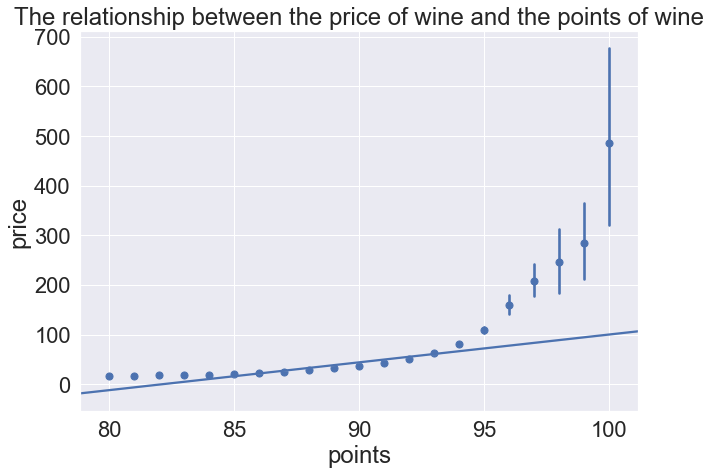

In [23]:
# define the plot size
plt.figure(figsize=(10,7))
sns.regplot(x='points', y='price', x_estimator=np.mean, data=data1)
plt.title('The relationship between the price of wine and the points of wine');
sns.set(font_scale = 2)

The plot shows top 5 most frequent type of grapes for price higher than 100, and we use data1[data1.variety.isin(data1.variety.value_counts().head(5).index)] to count the frequecy of grape's type, and plot a barplot

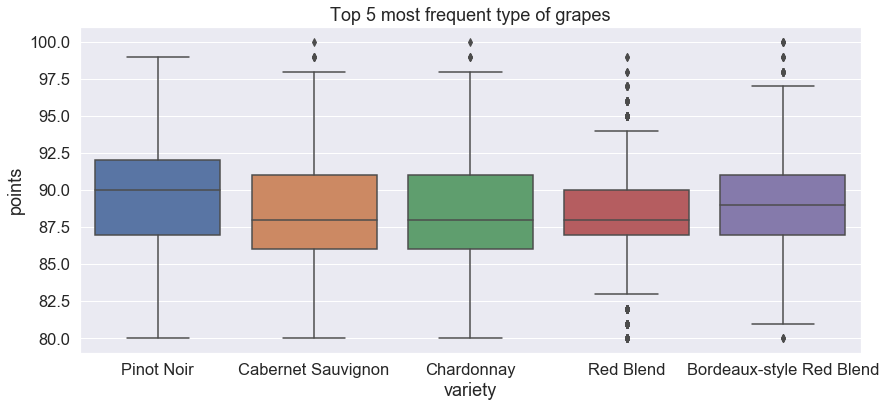

In [29]:
# only use data that price >100
data1[data1["price"]>100]
# count frequency and only show top 5
df1= data1[data1.variety.isin(data1.variety.value_counts().head(5).index)]
# set size
plt.figure(figsize = (14,6))
# use sns.boxplot create a boxplot
sns.boxplot(x = 'variety', y = 'points',data = df1)
# add a title
plt.title('Top 5 most frequent type of grapes');
# set font scale
sns.set(font_scale = 1.5)

Use groupby function group country, calcuate the mean of the price and point, and use info() function to check if the data has null value and remove null value

In [46]:
# use country columns to groupby
a=data1.groupby("country").mean()
print(a.info())
# drop null value
a = a.dropna(how = 'any')
print(a.info())

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, Argentina to Uruguay
Data columns (total 2 columns):
points    43 non-null float64
price     42 non-null float64
dtypes: float64(2)
memory usage: 1.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Argentina to Uruguay
Data columns (total 2 columns):
points    42 non-null float64
price     42 non-null float64
dtypes: float64(2)
memory usage: 1008.0+ bytes
None


Use 'country','points','price' columns to create a dataframe and only show points higher than 95, and then grouby country, and calculate the mean value

In [58]:
# only use 'country','points','price' columns with points >85
b = data1[data1["points"]>95][['country','points','price']]
# groupby country and calculate the mean
df = b[['country','points','price']].groupby(["country"]).mean()
# drop empty rows
df = df.dropna(how = 'any')
df = df.reset_index()
df

,country,points,price
0,Argentina,96.333333,72.666667
1,Australia,97.045455,274.318182
2,Austria,96.225806,77.793103
3,France,96.666667,345.589189
4,Germany,96.384615,330.200000
5,Hungary,96.250000,144.750000
6,Italy,96.839695,171.534884
7,Portugal,96.820513,211.342857
8,Spain,96.318182,191.409091
9,US,96.566952,110.487179


In [60]:
# convert wide to long format
df2=pd.melt(df,id_vars=['country'],var_name='points/price', value_name='values')
df2

,country,points/price,values
0,Argentina,points,96.333333
1,Australia,points,97.045455
2,Austria,points,96.225806
3,France,points,96.666667
4,Germany,points,96.384615
5,Hungary,points,96.250000
6,Italy,points,96.839695
7,Portugal,points,96.820513
8,Spain,points,96.318182
9,US,points,96.566952


We want to use python plotly library to generate a Choropleth Maps to show the average wine price for each country in the world, but the dataset have no country code, so we use a for loop to insert code to each country

In [65]:
# groupby country, and only use price columns
df = data1[['country','price']].groupby(["country"]).mean()
# create a empty columns in df
df['code'] = ''
# create a string to store code
lst = []
for i in range(len(df)):
    if(df.index[i] == 'Argentina'):
        lst.append('ARG')
    if(df.index[i] == 'Armenia'):
        lst.append('ARM')
    if(df.index[i] == 'Australia'):
        lst.append('AUS')
    if(df.index[i] == 'Austria'):
        lst.append('AUT')
    if(df.index[i] == 'Bosnia and Herzegovina'):
        lst.append('BIH')       
    if(df.index[i] == 'Brazil'):
        lst.append('BRA')          
    if(df.index[i] == 'Bulgaria'):
        lst.append('BGR')    
    if(df.index[i] == 'Canada'):
        lst.append('CAN')  
    if(df.index[i] == 'Chile'):
        lst.append('CHL')     
    if(df.index[i] == 'China'):
        lst.append('CHN')  
    if(df.index[i] == 'Croatia'):
        lst.append('HRV')          
    if(df.index[i] == 'Cyprus'):
        lst.append('CYP')         
    if(df.index[i] == 'Czech Republic'):
        lst.append('CZE') 
    if(df.index[i] == 'Egypt'):
        lst.append('EGY') 
    if(df.index[i] == 'England'):
        lst.append('GBR')  
    if(df.index[i] == 'France'):
         lst.append('FRA')
    if(df.index[i] == 'Georgia'):
        lst.append('GEO')             
    if(df.index[i] == 'Germany'):
        lst.append('DEU')
    if(df.index[i] == 'Greece'):
        lst.append('GRC')        
    if(df.index[i] == 'Hungary'):
        lst.append('HUN')        
    if(df.index[i] == 'India'):
        lst.append('IND')    
    if(df.index[i] == 'Israel'):
        lst.append('ISR')              
    if(df.index[i] == 'Italy'):
        lst.append('ITA')
    if(df.index[i] == 'Lebanon'):
        lst.append('LBN')        
    if(df.index[i] == 'Luxembourg'):
        lst.append('LUX')          
    if(df.index[i] == 'Macedonia'):
        lst.append('MKD')          
    if(df.index[i] == 'Mexico'):
        lst.append('MEX')  
    if(df.index[i] == 'Moldova'):
        lst.append('MDA')  
    if(df.index[i] == 'Morocco'):
        lst.append('MAR') 
    if(df.index[i] == 'New Zealand'):
        lst.append('NZL') 
    if(df.index[i] == 'Peru'):
        lst.append('PER') 
    if(df.index[i] == 'Portugal'):
        lst.append('PRT')
    if(df.index[i] == 'Romania'):
        lst.append('ROU')
    if(df.index[i] == 'Serbia'):
        lst.append('SRB')
    if(df.index[i] == 'Slovakia'):
        lst.append('SVK')
    if(df.index[i] == 'Slovenia'):
        lst.append('SVN')
    if(df.index[i] == 'South Africa'):
        lst.append('ZAF')
    if(df.index[i] == 'Spain'):
        lst.append('ESP')
    if(df.index[i] == 'Switzerland'):
        lst.append('CHE')      
    if(df.index[i] == 'Turkey'):
        lst.append('TUR')  
    if(df.index[i] == 'US'):
        lst.append('USA')
    if(df.index[i] == 'Ukraine'):
        lst.append('UKR')          
    if(df.index[i] == 'Uruguay'):
        lst.append('URY')
# give value to code columns
df['code'] = lst
# drop empty rows
df = df.dropna(how = 'any')
df

,price,code
country,,
Argentina,24.510117,ARG
Armenia,14.500000,ARM
Australia,35.437663,AUS
Austria,30.762772,AUT
Bosnia and Herzegovina,12.500000,BIH
Brazil,23.765957,BRA
Bulgaria,14.645390,BGR
Canada,35.712598,CAN
Chile,20.786458,CHL


We use python to draw a map of price in diffrent countries and regions, as we can see, European countries have a higher average price and other area with poor economy has lower average price. 

In [64]:
# load python library
import plotly.graph_objects as go

# use price columns as data, and code columns as location
fig = go.Figure(data=go.Choropleth(
    locations = df['code'],
    z = df['price'],
    text = df.index,
    colorscale = 'Reds',
    autocolorscale=True,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'price',
))
# set layout
fig.update_layout(
    title_text='Average price for each country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

fig.show()

Finlly we decide to use regular expression to analysis the descrpition part, which is the reviewers use words and sentences to describe the wine. And we did on wine with higher review(95+) and low review(85-) seperatedly, counting the words frequency. 

Top 10 key words for points > 95

In [91]:
# show maximum row and columns
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# use data that points >95
b = data1[data1['points']>95]
row1 = b['description']
row1.count()
# create pattern
bb = re.compile("[a-zA-Z]+")
name = bb.findall(str(row1))
newname = pd.DataFrame(name)
# count the total number for each words
dups = newname.pivot_table(index=[0], aggfunc='size')
# drop some special words
dups = dups.sort_values(ascending = False)
dups = dups.drop(['and','the','of','a','is','with','in','this','to',
           's','it','It','The','that','from','This','but','for'
          ,'its','Drink','on','are','A','as','now','has','wine',
           'an','at','by','years','finish'])
dups.head(10)

0
fruit      356
flavors    340
tannins    332
black      295
acidity    272
palate     213
rich       211
ripe       211
cherry     201
dark       166
dtype: int64

Top 10 key words for points < 85

In [19]:
# ony use that that points < 85
b = data1[data1['points']<85]
row1 = b['description']
row1.count()
# create a pattern
bb = re.compile("[a-zA-Z]+")
name = bb.findall(str(row1))
newname = pd.DataFrame(name)
# count the total number for each word
dups = newname.pivot_table(index=[0], aggfunc='size')
dups = dups.sort_values(ascending = False)
# drop some special words
dups = dups.drop(['and','the','of','a','is','with','in','this','to',
           's','it','It','The','that','from','This','but','for'
          ,'its','Drink','on','are','A','as','now','has','wine',
           'an','at','by','years','finish'])
dups.head(10)

0
flavors    6887
fruit      3737
aromas     3490
palate     2966
acidity    2379
sweet      2072
cherry     2050
red        1795
nose       1584
berry      1580
dtype: int64

In higher rated wine top key words includes'tanins', 'black', 'rich','ripe' in lower rated wine key words includes'aromas','sweet','red','berry'. Those key word may tell use customers preference, for example, 'sweet' shows up in lower rated wine more, which could be that reviewer consider too sweet wine does not taste good. And 'black' shows more frequently in '95+ group" and 'Red' is more in "85-group" is because a darker color means a better quality.

Summary: Overall, our research shows a country have better economy(HDI) is more likey to have a higher alcohol consumption, especially wine consumption. Wine price goes up as quality/rating goes up and high rated wine are above $100. We also summarize the Top grape types and other wine flavor features etc. 